# Simulating SDSS-based Surveys Using S4G Galaxies

### Mathematical Background

Assuming a uniform density of galaxies, the XXX

## Preliminary Setup

In [5]:
import scipy.stats
from scipy import interpolate

import plotutils as pu
import datautils as du

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.29)

sys.path.append("/Users/erwin/Documents/Working/Paper-DB_Catalog/paper-extended-wiyn-survey")
sys.path.append("/Users/erwin/Documents/Working/Projects/Project_BarSizes")
import datasets
nD16good = datasets.nD16good
s4gdata = datasets.s4gdata

# paths for locating data, saving plots, etc.
baseDir = "/Users/erwin/Documents/Working/Paper-s4gbars/"
plotDir = baseDir + "plots/"
baseDir2 = "/Users/erwin/Documents/Working/Projects/Project_BarSizes/"
simDir = baseDir2 + "simulated_surveys/"
savePlots = False


# axis labels, etc., for plots
xtmstar = r"$\log \: (M_{\star} / M_{\odot})$"
xtfgas = r"$\log \: (M_{\rm HI} / M_{\star})$"
ytfbar = r"Bar Fraction $f_{\rm bar}$"

ss0 = "All galaxies"
ss1 = r"S$^{4}$G: $D \leq 25$ Mpc"
ss1b = r"S$^{4}$G: $D \leq 25$ Mpc, $\log M_{\star} \geq 8.5$"
ss2 = r"S$^{4}$G: $D \leq 30$ Mpc"
ss2b = r"S$^{4}$G: $D \leq 30$ Mpc, $\log M_{\star} \geq 9$"
ss3 = r"S$^{4}$G: $D \leq 40$ Mpc"
ss3b = r"S$^{4}$G: $D \leq 40$ Mpc, $\log M_{\star} \geq 9.5$"

s4g_txt = r"S$^{4}$G"

In [2]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Defining different subsamples via index vectors

Copied from original S4G_barsizes_and_detectability notebook; contains lots of definitions we don't actually need for this notebook.


In [3]:
# general subsamples: all barred, all unbarred, all spirals
ii_barred = [i for i in range(nD16good) if s4gdata.sma[i] > 0]
ii_unbarred = [i for i in range(nD16good) if s4gdata.sma[i] <= 0]
ii_spirals = [i for i in range(nD16good) if s4gdata.t_s4g[i] > -0.5]


# limited sample 1: D < 25 Mpc -- 663 spirals: 373 barred, 290 unbarred
# (including S0: 737 galaxies: 400 barred, 337 unbarred)
ii_all_limited1 = [i for i in ii_spirals if s4gdata.dist[i] <= 25]
ii_barred_limited1 = [i for i in ii_all_limited1 if i in ii_barred]
ii_unbarred_limited1 = [i for i in ii_all_limited1 if i not in ii_barred]

ii_SB_limited1 = [i for i in ii_all_limited1 if i in ii_barred_limited1 and s4gdata.bar_strength[i] == 1]
ii_nonSB_limited1 = [i for i in ii_all_limited1 if i not in ii_SB_limited1]
ii_SAB_limited1 = [i for i in ii_all_limited1 if i in ii_barred_limited1 and s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited1 = [i for i in ii_all_limited1 if i not in ii_SB_limited1]

# S0 only (74 S0s: 27 barred, 47 unbarred)
ii_all_limited1_S0 = [i for i in range(nD16good) if s4gdata.dist[i] <= 25 and s4gdata.t_s4g[i] <= -0.5]
ii_barred_limited1_S0 = [i for i in ii_all_limited1_S0 if i in ii_barred]
ii_unbarred_limited1_S0 = [i for i in ii_all_limited1_S0 if i not in ii_barred]
ii_SB_limited1_S0 = [i for i in ii_SB_limited1 if s4gdata.t_s4g[i] <= -0.5]
ii_nonSB_limited1_S0 = [i for i in ii_nonSB_limited1 if s4gdata.t_s4g[i] <= -0.5]
ii_SAB_limited1_S0 = [i for i in ii_SAB_limited1 if s4gdata.t_s4g[i] <= -0.5]
ii_nonSAB_limited1_S0 = [i for i in ii_nonSAB_limited1 if s4gdata.t_s4g[i] <= -0.5]


# limited subsample 1m: D < 25 Mpc and log Mstar >= 8.5 -- 576 spirals: 356 barred, 220 unbarred
ii_all_limited1_m8_5 = [i for i in ii_all_limited1 if s4gdata.logmstar[i] >= 8.5]
ii_barred_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i in ii_barred]
ii_unbarred_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i not in ii_barred]
ii_SB_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i in ii_barred and s4gdata.bar_strength[i] == 1]
ii_nonSB_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i not in ii_SB_limited1_m8_5]
ii_SAB_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i in ii_barred and s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited1_m8_5 = [i for i in ii_all_limited1_m8_5 if i not in ii_SB_limited1_m8_5]
# S0 only (74 S0s: 27 barred, 47 unbarred)
ii_all_limited1_m8_5_S0 = [i for i in ii_all_limited1_S0 if s4gdata.logmstar[i] >= 8.5]
ii_barred_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i in ii_barred]
ii_unbarred_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i not in ii_barred]
ii_SB_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i in ii_barred and s4gdata.bar_strength[i] == 1]
ii_nonSB_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i not in ii_SB_limited1_m8_5_S0]
ii_SAB_limited1_m8_5_S0 = [i for i in ii_all_limited1_m8_5_S0 if i in ii_barred and s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited1_m8_5_s0 = [i for i in ii_all_limited1_m8_5_S0 if i not in ii_SAB_limited1_m8_5_S0 and s4gdata.t_s4g[i]]

# mass bins for barred spirals: D <= 25 Mpc
ii_barred_limited1_m85to9 = [i for i in ii_barred_limited1_m8_5 if s4gdata.logmstar[i] < 9]
ii_barred_limited1_m9to95 = [i for i in ii_barred_limited1_m8_5 if s4gdata.logmstar[i] >= 9 and s4gdata.logmstar[i] < 9.5]
ii_barred_limited1_m95to10 = [i for i in ii_barred_limited1_m8_5 if s4gdata.logmstar[i] >= 9.5 and s4gdata.logmstar[i] < 10]
ii_barred_limited1_m101to103 = [i for i in ii_barred_limited1_m8_5 if s4gdata.logmstar[i] >= 10.1 and s4gdata.logmstar[i] < 10.3]
ii_barred_limited1_m103to105 = [i for i in ii_barred_limited1_m8_5 if s4gdata.logmstar[i] >= 10.3 and s4gdata.logmstar[i] < 10.5]

ii_barred_limited1_m8_5to11 = [i for i in ii_barred_limited1_m8_5 if s4gdata.logmstar[i] <= 11]



# limited subsample 2: D < 30 Mpc -- 856 galaxies: 483 barred, 373 unbarred
# (including S0s: 944 galaxies: 519 barred, 425 unbarred)
ii_all_limited2 = [i for i in ii_spirals if s4gdata.dist[i] <= 30]
ii_barred_limited2 = [i for i in ii_all_limited2 if i in ii_barred]
ii_unbarred_limited2 = [i for i in ii_all_limited2 if i not in ii_barred]

ii_SB_limited2 = [i for i in ii_barred_limited2 if s4gdata.bar_strength[i] == 1]
ii_nonSB_limited2 = [i for i in ii_all_limited2 if i not in ii_SB_limited2]
ii_SAB_limited2 = [i for i in ii_barred_limited2 if s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited2 = [i for i in ii_all_limited2 if i not in ii_SB_limited2]

# S0 only (74 S0s: 27 barred, 47 unbarred)
ii_all_limited2_S0 = [i for i in range(nD16good) if s4gdata.dist[i] <= 30 and s4gdata.t_s4g[i] <= -0.5]
ii_barred_limited2_S0 = [i for i in ii_all_limited2_S0 if i in ii_barred]
ii_unbarred_limited2_S0 = [i for i in ii_all_limited2_S0 if i not in ii_barred]
ii_SB_limited2_S0 = [i for i in ii_SB_limited2 if s4gdata.t_s4g[i] <= -0.5]
ii_nonSB_limited2_S0 = [i for i in ii_nonSB_limited2 if s4gdata.t_s4g[i] <= -0.5]
ii_SAB_limited2_S0 = [i for i in ii_SAB_limited2 if s4gdata.t_s4g[i] <= -0.5]
ii_nonSAB_limited2_S0 = [i for i in ii_nonSAB_limited2 if s4gdata.t_s4g[i] <= -0.5]


# limited subsample 2m: D < 30 Mpc and log Mstar >= 9 -- 639 galaxies: 398 barred, 241 unbarred
# (including S0s: 722 galaxies: 433 barred, 289 unbarred)
ii_all_limited2_m9 = [i for i in ii_all_limited2 if s4gdata.logmstar[i] >= 9]
ii_barred_limited2_m9 = [i for i in ii_all_limited2_m9 if i in ii_barred]
ii_unbarred_limited2_m9 = [i for i in ii_all_limited2_m9 if i not in ii_barred]

ii_SB_limited2_m9 = [i for i in ii_all_limited2_m9 if i in ii_barred and s4gdata.bar_strength[i] == 1]
ii_nonSB_limited2_m9 = [i for i in ii_all_limited2_m9 if i not in ii_SB_limited2_m9]
ii_SAB_limited2_m9 = [i for i in ii_all_limited2_m9 if i in ii_barred and s4gdata.bar_strength[i] == 2]
ii_nonSAB_limited2_m9 = [i for i in ii_all_limited2_m9 if i not in ii_SAB_limited2_m9]

ii_barred_limited2_m9to11 = [i for i in ii_all_limited2_m9 if i in ii_barred and s4gdata.logmstar[i] <= 11]


# mass bins for barred galaxies: D <= 30 Mpc
ii_barred_limited2_m9to95 = [i for i in ii_barred_limited2_m9 if s4gdata.logmstar[i] >= 9 and s4gdata.logmstar[i] < 9.5]
ii_barred_limited2_m95to10 = [i for i in ii_barred_limited2_m9 if s4gdata.logmstar[i] >= 9.5 and s4gdata.logmstar[i] < 10]
ii_barred_limited2_m101to103 = [i for i in ii_barred_limited2_m9 if s4gdata.logmstar[i] >= 10.1 and s4gdata.logmstar[i] < 10.3]
ii_barred_limited2_m103to105 = [i for i in ii_barred_limited2_m9 if s4gdata.logmstar[i] >= 10.3 and s4gdata.logmstar[i] < 10.5]
ii_barred_limited2_m105to107 = [i for i in ii_barred_limited2_m9 if s4gdata.logmstar[i] >= 10.5 and s4gdata.logmstar[i] < 10.7]
ii_barred_limited2_m107to11 = [i for i in ii_barred_limited2_m9 if s4gdata.logmstar[i] >= 10.7 and s4gdata.logmstar[i] < 11]


### Load Published Bar Frequencies

In [10]:
def Read2ColumnProfile( fname ):
    dlines = [line for line in open(fname) if len(line) > 1 and line[0] != "#"]
    x = [float(line.split()[0]) for line in dlines]
    y = [float(line.split()[1]) for line in dlines]
    return np.array(x), np.array(y)

def ReadSheth08( fname ):
    dlines = [line for line in open(fname) if line[0] != "#"]
    logMstar = np.array([float(line.split()[0]) for line in dlines])
    nBar = [int(line.split()[1]) for line in dlines]
    nTot = [int(line.split()[2]) for line in dlines]
    f = []
    sig_low = []
    sig_high = []
    for i in range(len(logMstar)):
        p, sig_minus, sig_plus = astrostat.Binomial(nBar[i], nTot[i])
        f.append(p)
        sig_low.append(sig_minus)
        sig_high.append(sig_plus)
    return (logMstar, np.array(f), np.array(sig_low), np.array(sig_high))


# Published f(bar) vs logMstar: Oh+2012, Masters+2012, Melvin+2012
logmstar_oh12,fbar_oh12 = Read2ColumnProfile(baseDir+"f_bar_trends-from-literature/fbar-vs-logMstar_oh+2012.txt")
logmstar_m12,fbar_m12 = Read2ColumnProfile(baseDir+"f_bar_trends-from-literature/fbar-vs-logMstar_masters+2012.txt")
logmstar_m14,fbar_m14 = Read2ColumnProfile(baseDir+"f_bar_trends-from-literature/fbar-vs-logMstar_melvin+2014.txt")

# Published f(bar) vs log(f_gas): Masters+2012
logfgas_m12,fbar_m12_fgas = Read2ColumnProfile(baseDir+"f_bar_trends-from-literature/fbar-vs-logfgas_masters+2012.txt")

# Published f(bar) vs log(M_star) at high redshifts: Sheth+2008
logmstar_s08h,fbar_s08h,sigma_low_s08h,sigma_high_s08h = ReadSheth08(baseDir+"f_bar_trends-from-literature/fbar-vs-logmstar_sheth+2008_counts_highz.txt")

## Simulated SDSS Surveys

### I. Bar Fraction vs Stellar Mass

### logMstar: Plot for Paper

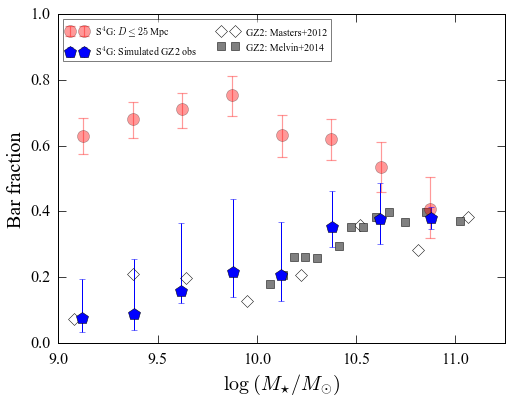

In [6]:
dd2dp = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_SDSS_200_dp-sizes.txt", columnRow=0, dataFrame=True)

# Plot for paper
plt.plot(logmstar_m12, fbar_m12, 'D', mfc="None",mec='k', ms=9,label='GZ2: Masters+2012')
plt.plot(logmstar_m14, fbar_m14, 's', mfc="0.5",mec='k', ms=8,label='GZ2: Melvin+2014')
pu.PlotFrequencyWithWeights(s4gdata.logmstar, s4gdata.w25, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.25, 0.25, fmt='ro', ms=12, noErase=True, alpha=0.4,label=ss1)
plt.errorbar(dd2dp.logMstar, dd2dp.medFbar, yerr=[dd2dp.sigma_low, dd2dp.sigma_high], fmt='bp', ms=12, label=r'S$^{4}$G: Simulated GZ2 obs')
plt.ylim(0,1);plt.xlim(9,11.25)
plt.xlabel(xtmstar)
plt.ylabel('Bar fraction')

# re-order labels in legend
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
handles = [handles[2], handles[3], handles[0], handles[1]]
labels = [labels[2], labels[3], labels[0], labels[1]]
legend(handles, labels, loc="upper left", fontsize=10, ncol=2, framealpha=0.5)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-mass-sim.pdf")

### II. Bar Fraction vs Gas Mass Fraction

### fgas: Plot for Paper

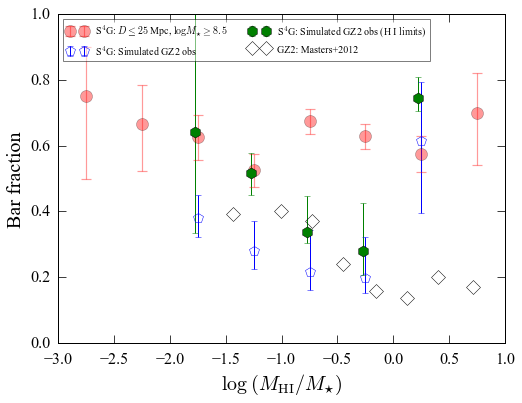

In [7]:
# Using D <= 30 dataset as parent sample to observe
# First is deprojected bar sizes, no H I selection
# Second uses observed bar sizes + approx. ALFALFA H I limits
d30dp_sp = du.ReadCompositeTable(simDir+"sim_logfgas_d30_2xfwhm_SDSS_200_dp-sizes.txt", columnRow=0, dataFrame=True)
d30hi_sp = du.ReadCompositeTable(simDir+"sim_logfgas_d30m95_sp_2xfwhm_SDSS_200_HI-limited.txt", columnRow=0, dataFrame=True)



# Published f(bar) vs log(f_gas)
plt.plot(logfgas_m12, fbar_m12_fgas, 'D', mfc="None",mec='k', ms=10,label='GZ2: Masters+2012')

pu.PlotFrequency(s4gdata.logfgas, ii_barred_limited1_m8_5, ii_unbarred_limited1_m8_5, -3,2,0.5, noErase=True, fmt='ro', ms=12, alpha=0.4, label=ss1b)
plt.errorbar(d30dp_sp.log_fgas, d30dp_sp.medFbar, yerr=[d30dp_sp.sigma_low, d30dp_sp.sigma_high], fmt='bp', mfc='None', mec='b', ms=11, label=r'S$^{4}$G: Simulated GZ2 obs')
plt.errorbar(d30hi_sp.log_fgas - 0.025, d30hi_sp.medFbar, yerr=[d30hi_sp.sigma_low, d30hi_sp.sigma_high], fmt='gh', ms=11, label=r'S$^{4}$G: Simulated GZ2 obs (H I limits)')
plt.xlabel(xtfgas);plt.ylabel('Bar fraction')
plt.ylim(0,1);plt.xlim(-3,1)

# re-order labels in legend
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[2], handles[3], handles[0]]
labels = [labels[1], labels[2], labels[3], labels[0]]
legend(handles, labels, loc="upper left", fontsize=10, ncol=2, framealpha=0.5)

# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: plt.savefig(plotDir+"fbar-vs-fgas-sim.pdf")

## Simulated HST Surveys

### S4G seen at high redshift, full and half barsize, vs Sheth+2008

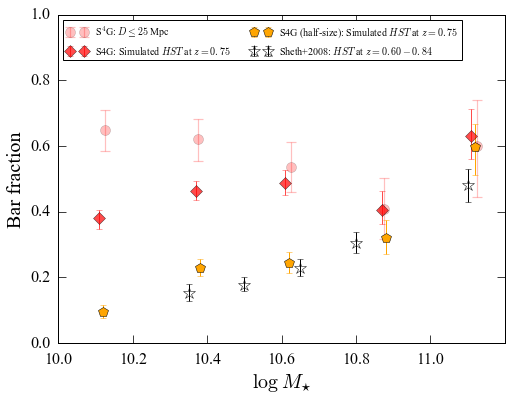

In [11]:
dd075 = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.75_200_dp-sizes.txt", columnRow=0, dataFrame=True)
dd075_half = du.ReadCompositeTable(simDir+"sim_logMstar_d30_sp_2xfwhm_HST_z0.75_200_dp-sizes_scale0.5.txt", columnRow=0, dataFrame=True)

pu.PlotFrequency(s4gdata.logmstar, ii_barred_limited1, ii_unbarred_limited1, 8.0, 11.3, 0.25, fmt='ro', ms=10, noErase=True, alpha=0.25,label=ss1)
txtfull = 'S4G: Simulated $HST$ at $z=0.75$'
plt.errorbar(dd075.logMstar - 0.01, dd075.medFbar, yerr=[dd075.sigma_low, dd075.sigma_high], fmt='rD', ms=9, alpha=0.7, label=txtfull)
txthalf = 'S4G (half-size): Simulated $HST$ at $z=0.75$'
plt.errorbar(dd075_half.logMstar, dd075_half.medFbar, yerr=[dd075_half.sigma_low, dd075_half.sigma_high], fmt='p', color='orange', ms=11, label=txthalf)

txts08 = r'Sheth+2008: $HST$ at $z = 0.60-0.84$'
plt.errorbar(logmstar_s08h, fbar_s08h, yerr=[sigma_low_s08h, sigma_high_s08h], fmt='*', mfc="None",mec='k', ecolor='k',ms=12,label=txts08)
plt.ylim(0,1);plt.xlim(10,11.2)
plt.xlabel(r"$\log \: M_{\star}$")
plt.ylabel('Bar fraction')
legend(loc="upper left", ncol=2,fontsize=10)
# push bottom of plot upwards so that x-axis label isn't clipped in PDF output
plt.subplots_adjust(bottom=0.14)
if savePlots: savefig(plotDir+"barsize-vs-mass-with-high-z-sim.pdf")